In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# We can see all columns in df.head() / and .tail()
pd.set_option('display.max_columns', None)

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1tq4NEEKTnchbTlXlzfgNNAxY2n0azvhp' #<-- You add in here the id from you google drive file, you can find it
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
combined_df  = pd.read_csv("file.csv")

In [4]:
pd.set_option('display.max_columns', 1000)  

combined_df.head(50)


,Unnamed: 0,Distance,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of,Sex,Age,VD_Major,VD_Minor,VD_Moderate,VD_N/A,VD_None,VD_Totaled,VD_Unknown,PC_Bicycle,PC_Driver,PC_Other,PC_Parked,PC_Pedestrian,PC_Unknown,Had Been Drinking - Impairment Unknown,Had Been Drinking - Not Under Influence,Had Been Drinking - Under Influence,Had Not Been Drinking,Impairment Not Known,Impairment Physical,Sleepy/Fati

In [5]:
combined_df.shape

(41423, 299)

In [6]:
combined_df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
combined_df.shape

(41423, 298)

In [8]:
combined_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41423 entries, 0 to 41422
Data columns (total 298 columns):
 #    Column                                                        Dtype  
---   ------                                                        -----  
 0    Distance                                                      float64
 1    CityDamageFlag_False                                          float64
 2    CityDamageFlag_True                                           float64
 3    ShortFormFlag_False                                           float64
 4    ShortFormFlag_True                                            float64
 5    PedestrianAction_Approaching/Leaving School Bus               float64
 6    PedestrianAction_Crossing - Not In Crosswalk                  float64
 7    PedestrianAction_Crossing In Crosswalk - At Intersection      float64
 8    PedestrianAction_Crossing In Crosswalk - Not At Intersection  float64
 9    PedestrianAction_In Road - Includes Shoulder    

# Baseline Model

In [9]:
y = combined_df['Severity']
X = combined_df.drop('Severity',axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
model = LogisticRegression(max_iter = 200, random_state = 42)

model.fit(x_train,y_train)
y_pred_baseline = model.predict(x_test)
print('Acurracy of train ',(model.score(x_train, y_train)*100))
print('Acurracy of test ',(accuracy_score(y_test, y_pred_baseline)*100))

Acurracy of train  72.61346392605876
Acurracy of test  71.65848555564497


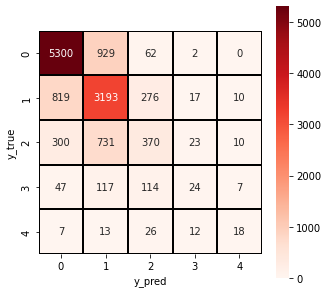

In [11]:
cm1 = confusion_matrix(y_test, y_pred_baseline)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [12]:
print(classification_report(y_test,y_pred_baseline))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6293
           1       0.64      0.74      0.69      4315
           2       0.44      0.26      0.32      1434
           3       0.31      0.08      0.12       309
           4       0.40      0.24      0.30        76

    accuracy                           0.72     12427
   macro avg       0.52      0.43      0.45     12427
weighted avg       0.70      0.72      0.70     12427



# Data Regularization

In [13]:
# Lasso L1 AND L2
model = LogisticRegression(max_iter = 200, random_state = 42)
lasso = LogisticRegression(penalty='l1', solver='liblinear',random_state=42)
ridge = LogisticRegression(penalty='l2', random_state=42)

In [14]:
clfs = {'baseline_logistic_regression' : model, 'lasso_log_reg': lasso, 'ridge_log_reg': ridge}

In [15]:
def train_classifier(clf, X_train, y_train):      #function to train all the models
    clf.fit(X_train, y_train)

def predict_labels(clf, X_test):                 # function to predict all the models
    return (clf.predict(X_test))  

pred_scores = []
for k,v in clfs.items():
    train_classifier(v,x_train,y_train)
    pred = predict_labels(v,x_test)
    pred_scores.append((k, accuracy_score(y_test,pred),f1_score(y_test,pred,average = 'weighted')))

In [16]:
scores = pd.DataFrame(pred_scores,columns = ['Classifier','Accuracy Score','F1 Score'])
scores = scores.set_index('Classifier')
scores

,Accuracy Score,F1 Score
Classifier,,
baseline_logistic_regression,0.716585,0.701281
lasso_log_reg,0.714734,0.696718
ridge_log_reg,0.715539,0.699661


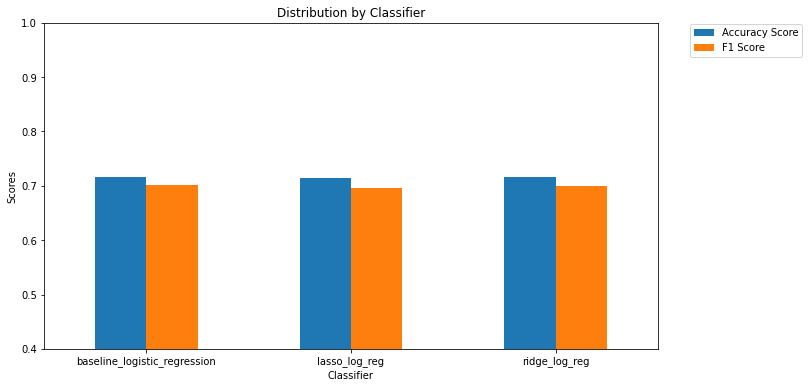

In [17]:
scores.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center')
plt.ylabel('Scores')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.xticks(rotation=0)
plt.show()

# Data Reduction

In [18]:
# Cite Source: Hands-On Machine Learning w/ Scikit-Learn by Aurelien Geron ************

# Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
# simpler to choose the number of dimensions that add up to 95% variance
from sklearn.decomposition import PCA

# Computes the minimum number of dimensions required to preserve 95% of the training
# set's variance
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 75
d

76

In [19]:
# n_components is the ratio of variance we wish to preserve
# We know that 75 features will preserve 95% variance
# So we will set 'n_components' = d 
pca = PCA(n_components=d)

# Apply to x_train and x_test
X_train_reduced = pca.fit_transform(x_train)
X_test_reduced = pca.transform(x_test)

In [20]:
# Check number of columns
# 75 @ 95% variance
pca.n_components_

76

In [21]:
# check variance to ensure 95%
pca.explained_variance_ratio_.sum()  

0.9511921037105324

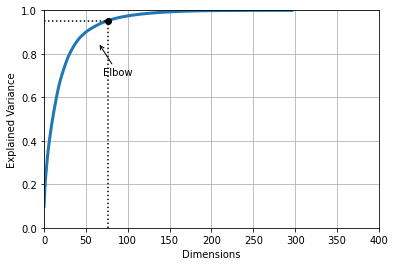

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

In [23]:
# Test PCA
model2 = LogisticRegression(max_iter = 200, random_state = 42)
pca_mod = LogisticRegression(max_iter = 200, random_state = 42)

pred_scores2 = []

clfs2 = {'baseline_logistic_regression' : model2, 'pca_log_reg': pca}

pca_mod.fit(X_train_reduced,y_train)
y_pred_pca = pca_mod.predict(X_test_reduced)

model2.fit(x_train,y_train)
y_pred_baseline2 = model.predict(x_test)

pred_scores2.append((list(clfs2.keys())[0],accuracy_score(y_test,y_pred_baseline2),f1_score(y_test,y_pred_baseline2,average='weighted')))
pred_scores2.append((list(clfs2.keys())[1],accuracy_score(y_test,y_pred_pca),f1_score(y_test,y_pred_pca,average='weighted')))

In [24]:
# pca 0.711866  0.694810 @ 95% variance
# From 297 features down to just 75 and our scores are nearly the exact same. This is good. 
scores2 = pd.DataFrame(pred_scores2,columns = ['Classifier','Accuracy Score','F1 Score'])
scores2 = scores2.set_index('Classifier')
scores2

,Accuracy Score,F1 Score
Classifier,,
baseline_logistic_regression,0.716585,0.701281
pca_log_reg,0.710228,0.691059


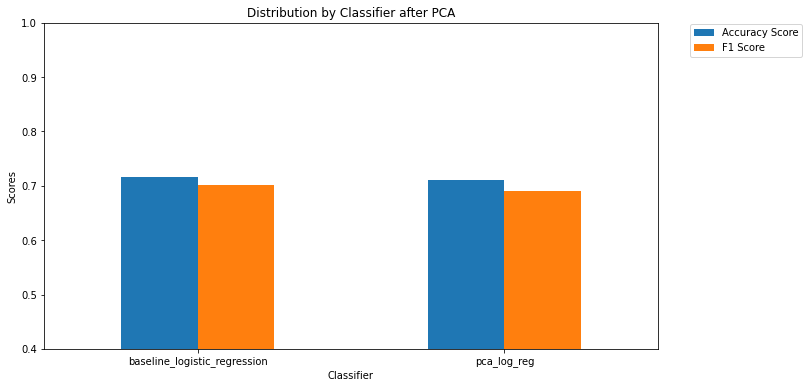

In [25]:
scores2.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center')
plt.ylabel('Scores')
plt.title('Distribution by Classifier after PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.xticks(rotation=0)
plt.show()

In [26]:
dfandy=pd.DataFrame(y_train)
dfandy1=pd.DataFrame(X_test_reduced)

In [27]:
dfandy.head()

,Severity
4216,0
31298,2
8574,0
26716,2
12989,0


In [28]:
dfandy1.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12427 entries, 0 to 12426
Columns: 76 entries, 0 to 75
dtypes: float64(76)
memory usage: 7.2 MB


### Random Forest Feature Selection

In [29]:
# PCA vs Random Forest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)

In [30]:
# Random Forest feature importance in descending order
importances = rnd_clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = combined_df.columns[0:]
 
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Age                            0.085959
 2) ShortFormFlag_True             0.044276
 3) ShortFormFlag_False            0.038632
 4) Distance                       0.032211
 5) VD_Unknown                     0.030828
 6) ViolationCode_Unknown          0.021306
 7) ViolationCode_N/A              0.019806
 8) Sex                            0.019533
 9) VD_Major                       0.016691
10) Had Not Been Drinking          0.016298
11) VehicleInvolvedWith_Other Vehicle 0.015777
12) South                          0.014184
13) North                          0.013885
14) East                           0.013732
15) West                           0.013592
16) Proceeding Straight            0.013431
17) VD_Moderate                    0.012611
18) Lighting_Daylight              0.012598
19) Impairment Not Known           0.012499
20) OtherAssociatedFactor_N/A      0.012414
21) VD_Minor                       0.012265
22) PrimaryCollisionFactor_Unknown 0.012186
23) 22350                    

# Sampling SMOTE

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

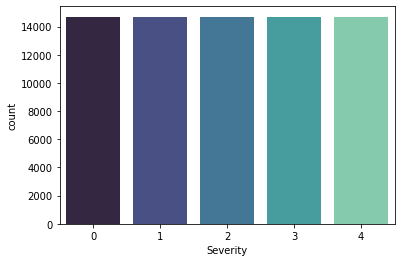

In [32]:
sns.countplot(y_res,palette = 'mako');

In [33]:
# 0    20955
# 1    14486
# 2     4637
# 3      987
# 4      256
y_res.value_counts()

0    14706
2    14706
1    14706
4    14706
3    14706
Name: Severity, dtype: int64

In [34]:
def train_classifier_smote(clf, X_train, y_train):      #function to train all the models
    clf.fit(X_train, y_train.ravel())

def predict_labels_smote(clf, X_test):                 # function to predict all the models
    return (clf.predict(X_test)) 

pred_scores_smote = []
for k,v in clfs.items():
    train_classifier_smote(v,X_res,y_res)
    pred = predict_labels_smote(v,x_test)
    pred_scores_smote.append((k, accuracy_score(y_test,pred),f1_score(y_test,pred,average = 'weighted')))

In [35]:
scores_smote = pd.DataFrame(pred_scores_smote,columns = ['Classifier','Accuracy Score','F1 Score'])
scores_smote = scores_smote.set_index('Classifier')
scores_smote

,Accuracy Score,F1 Score
Classifier,,
baseline_logistic_regression,0.651163,0.678290
lasso_log_reg,0.652209,0.679383
ridge_log_reg,0.650600,0.679022


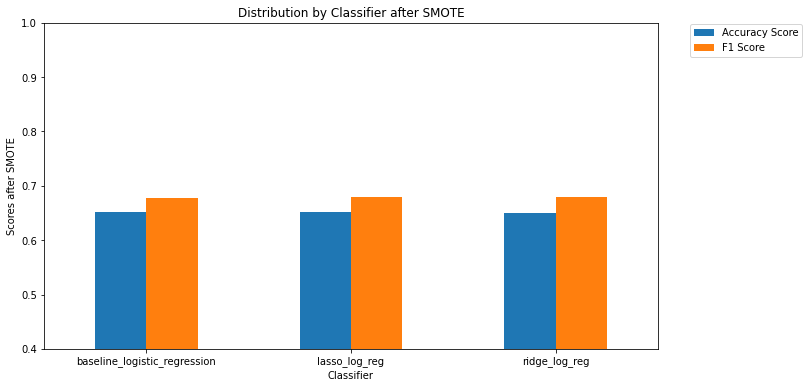

In [36]:
scores_smote.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center')
plt.ylabel('Scores after SMOTE')
plt.title('Distribution by Classifier after SMOTE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.xticks(rotation=0)
plt.show()

# Model KNN

In [62]:
andy_y_test=y_test.tolist()
neighlist=[]
neigh=KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train,y_train)
neighlist.append(neigh.predict(x_test))
correct=0
total=0
for i in neighlist[0]:
  if i == andy_y_test[i]:
    correct+=1
  total+=1
print(correct/total)





0.5708537861108876


list

# Model Random Forest

In [ ]:
#


# Model XGboost

In [ ]:
#
